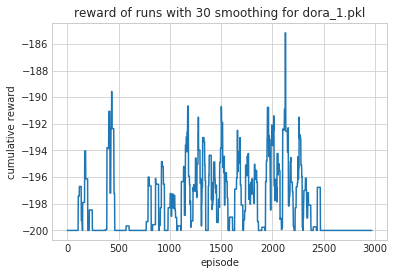

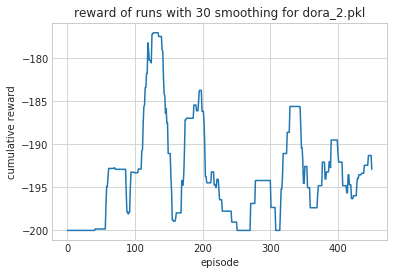

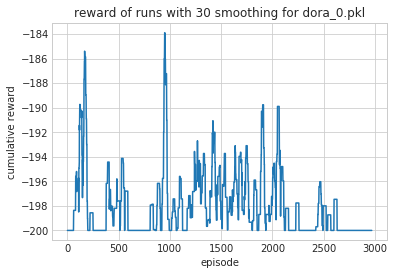

In [28]:
import os
import numpy as np
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

sns.set_style("whitegrid")

logdir = 'logs'
mode = 'dora'
smooth = 30

for fn in os.listdir(logdir):
    if not fn.startswith(mode):
        continue
    rewards = joblib.load(os.path.join(logdir, fn))
    rewards = running_mean(rewards, smooth)
    plt.plot(rewards)
    plt.title('reward of runs with {} smoothing for {}'.format(smooth, fn))
    plt.xlabel('episode')
    plt.ylabel('cumulative reward')
    plt.show()
        

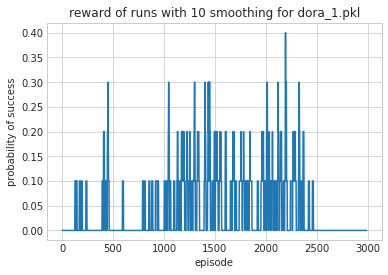

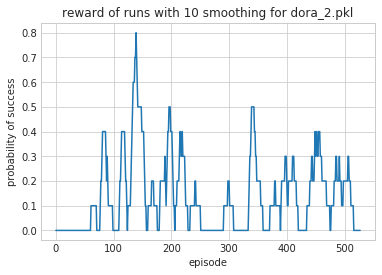

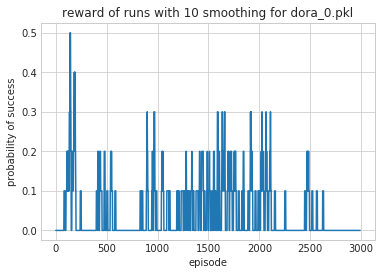

In [33]:
import os
import numpy as np
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt

def running_prob(x, N):
    prob = (np.array(x) > -200)
    cumsum = np.cumsum(np.insert(prob, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

sns.set_style("whitegrid")

logdir = 'logs'
mode = 'dora'
smooth = 10

for fn in os.listdir(logdir):
    if not fn.startswith(mode):
        continue
    rewards = joblib.load(os.path.join(logdir, fn))
    # convert to probability
    rewards = running_prob(rewards, smooth)
    plt.plot(rewards)
    plt.title('reward of runs with {} smoothing for {}'.format(smooth, fn))
    plt.xlabel('episode')
    plt.ylabel('probability of success')
    plt.show()

In [88]:
import os
import numpy as np
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
c = joblib.load('logs/dora_counter_default.pkl')

In [90]:
c.keys()

dict_keys([(8, 2), (9, 2), (10, 3), (10, 2), (11, 2), (12, 2)])

(10, 3) [[0.5, 0.99733497500419621]]


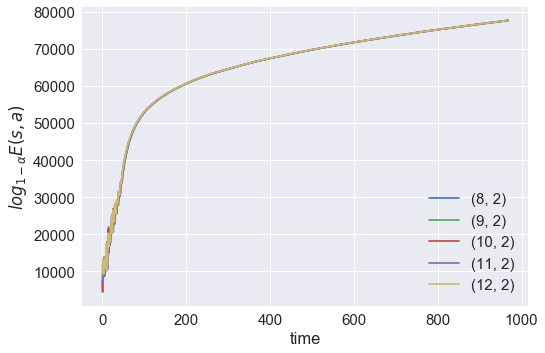

In [91]:
import math
sns.set(font_scale=1.5)
def math_log(a, base):
    return list(map(lambda x: math.log(x, base), a))
for k, v in c.items():
    if len(v) <= 1:
        print(k, v)
        continue
        
    Es = list(map(lambda a: a[0], c[k]))
    plt.plot(math_log(Es, 1-1e-4), label="%s" % str(k))

plt.legend()
plt.ylabel(r'$log_{1-\alpha} E(s, a)$')
plt.xlabel('time')
plt.show()

(10, 3) [[0.5, 0.99733497500419621]]


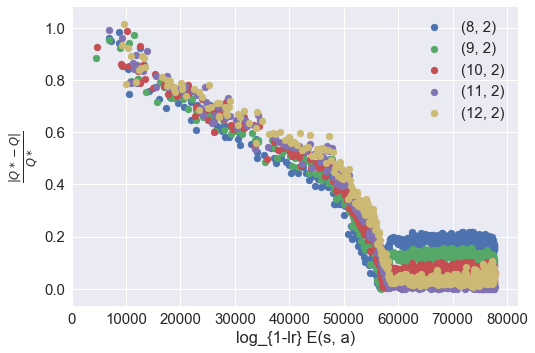

In [92]:
import math

def math_log(a, base):
    return list(map(lambda x: math.log(x, base), a))
for k, v in c.items():
    if len(v) <= 1:
        print(k, v)
        continue
    Es = list(map(lambda a: a[0], c[k]))
    qdiff = list(map(lambda a: a[1], c[k]))
    
    plt.scatter(math_log(Es, 1-1e-4), qdiff, label="%s" % str(k))

plt.legend()
plt.xlabel('log_{1-lr} E(s, a)')
plt.ylabel(r'$\frac{|Q*-Q|}{Q*}$')

plt.show()